In [1]:
import pandas as pd
mlb = pd.read_csv("data/mlb.csv")
print(mlb.head())
print(mlb.shape)

              name team       position  height  weight    age
0    Adam_Donachie  BAL        Catcher      74   180.0  22.99
1        Paul_Bako  BAL        Catcher      74   215.0  34.69
2  Ramon_Hernandez  BAL        Catcher      72   210.0  30.78
3     Kevin_Millar  BAL  First_Baseman      72   210.0  35.43
4      Chris_Gomez  BAL  First_Baseman      73   188.0  35.71
(1034, 6)


In [2]:
mlb.describe()

,height,weight,age
count,1034.000000,1033.000000,1034.000000
mean,73.697292,201.689255,28.736712
std,2.305818,20.991491,4.320310
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.925000
75%,75.000000,215.000000,31.232500
max,83.000000,290.000000,48.520000


([<matplotlib.axis.XTick at 0x16b6026d0>], [Text(1, 0, 'Full Population')])

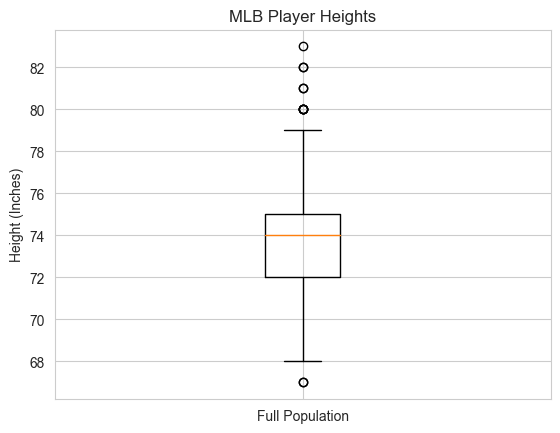

In [3]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.boxplot(mlb['height'])
ax1.set_ylabel("Height (Inches)")
plt.title("MLB Player Heights")
plt.xticks([1], ["Full Population"])

In [4]:
sample1 = mlb.sample(n=30, random_state=8675309)
sample2 = mlb.sample(n=30, random_state=1729)
sample3 = [71, 72, 73, 74, 76, 75, 75, 76, 75, 77, 76, 75, 77, 76, 75, 76, 76, 75, 75, 81, 77, 75, 77, 77, 75, 75]

([<matplotlib.axis.XTick at 0x16b6ab3d0>,
 [Text(1, 0, 'Full Population'),
  Text(2, 0, 'Sample 1'),
  Text(3, 0, 'Sample 2'),
  Text(4, 0, 'Sample 3')])

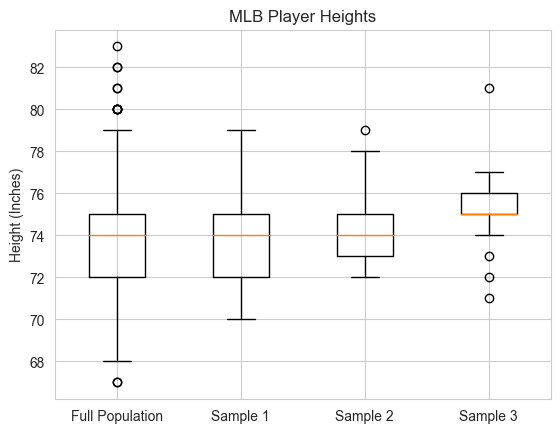

In [5]:
import numpy as np
fig1, ax1 = plt.subplots()
ax1.boxplot([mlb['height'], sample1['height'], sample2['height'], np.array(sample3)])
ax1.set_ylabel("Height (Inches)")
plt.title("MLB Player Heights")
plt.xticks([1, 2, 3, 4], ["Full Population", "Sample 1", "Sample 2", "Sample 3"])

In [6]:
print(np.mean(sample1["height"]))
print(np.mean(sample2["height"]))
print(np.mean(sample3))

73.8
74.36666666666666
75.46153846153847


In [7]:
alldifferences = []
for i in range(1000):
    newsample1 = mlb.sample(n=30, random_state=i*2)
    newsample2 = mlb.sample(n=30, random_state=i*2+1)
    alldifferences.append(newsample1['height'].mean()-newsample2['height'].mean())

alldifferences[0:10]

[0.8333333333333286,
 -0.30000000000001137,
 -0.10000000000000853,
 -0.1666666666666572,
 0.06666666666667709,
 -0.9666666666666686,
 0.7999999999999972,
 0.9333333333333371,
 -0.5333333333333314,
 -0.20000000000000284]

/Users/drewlitman/Code/DiveIntoData/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(8.319444444444445, 0.5, 'Relative Frequency')

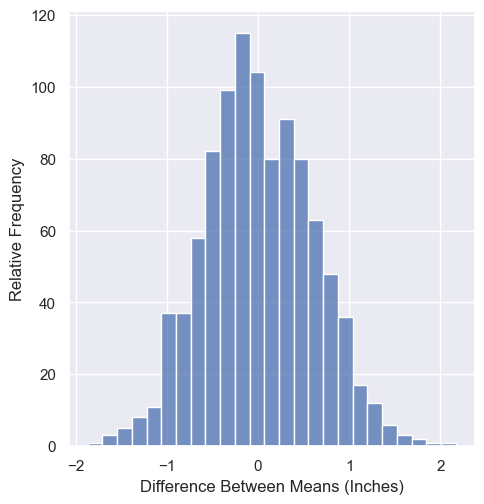

In [8]:
import seaborn as sns
sns.set()
ax = sns.displot(alldifferences).set_titles("Differences Between Sample Means")
plt.xlabel("Difference Between Means (Inches)")
plt.ylabel("Relative Frequency")

In [9]:
largedifferences=[diff for diff in alldifferences if abs(diff) >= 1.6]
len(largedifferences)

8

In [10]:
smalldifferences=[diff for diff in alldifferences if abs(diff)>= 0.6]
len(smalldifferences)

314

In [11]:
import scipy.stats
scipy.stats.ttest_ind(sample1['height'], sample2['height'])

TtestResult(statistic=-1.0839563860213952, pvalue=0.28286958923051514, df=58.0)

In [12]:
scipy.stats.ttest_ind(sample1['height'], sample3)

TtestResult(statistic=-2.970879932563431, pvalue=0.004425276274001259, df=54.0)

In [13]:
scipy.stats.mannwhitneyu(sample1['height'], sample2['height'])

MannwhitneyuResult(statistic=392.0, pvalue=0.38913738408151577)

In [14]:
desktop = pd.read_csv('data/desktop.csv')
laptop = pd.read_csv('data/laptop.csv')

In [15]:
import matplotlib.pyplot as plt
sns.reset_orig()
fig1, ax1 = plt.subplots()
ax1.boxplot([desktop['spending'].values,laptop['spending'].values])
ax1.set_title('Spending by Desktop and Laptop Subscribers')
ax1.set_ylabel('Spending ($)')
plt.xticks([1,2], ['Desktop Subscribers','Laptop Subscribers'])

([<matplotlib.axis.XTick at 0x16b829c10>,
 [Text(1, 0, 'Desktop Subscribers'), Text(2, 0, 'Laptop Subscribers')])

In [16]:
print(np.mean(desktop['age']))
print(np.mean(laptop['age']))

print(np.median(desktop['age']))
print(np.median(laptop['age']))

print(np.quantile(desktop['spending'], 0.25))
print(np.quantile(laptop['age'], 0.75))

print(np.std(desktop['age']))
print(np.std(laptop['age']))

35.766666666666666
38.733333333333334
32.0
33.0
127.5
49.75
14.943634839697543
16.816526263041233


In [17]:
scipy.stats.ttest_ind(desktop['spending'], laptop['spending'])

TtestResult(statistic=-2.109853741030508, pvalue=0.03919630411621093, df=58.0)